In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [15]:
#read from csv file 
df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:

X = df.drop(columns=['diagnosis','Unnamed: 32'],axis=1)
y = df.diagnosis

In [4]:
len(df)

569

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
col =list(df.columns)

In [7]:
col.remove('Unnamed: 32')
col.remove('diagnosis')
col

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

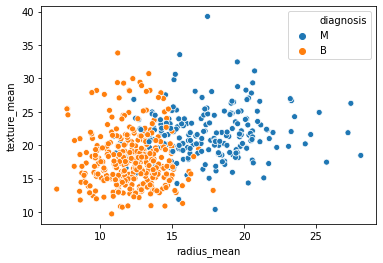

In [8]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=df,hue='diagnosis')

In [16]:
# NearMiss

from imblearn.under_sampling import NearMiss
NM = NearMiss(version=2,ratio=1)
new_X, new_y = NM.fit_resample(X, y)



In [17]:
pd.Series(new_y).value_counts()

B    212
M    212
dtype: int64

In [19]:
new_df = pd.DataFrame(new_X,columns=col)
new_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,91903902.0,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
1,91903901.0,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,0.1859,...,13.35,28.81,87.00,550.6,0.1550,0.2964,0.2758,0.08120,0.3206,0.08950
2,91813702.0,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592
3,91813701.0,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,...,15.35,25.16,101.90,719.8,0.1624,0.3124,0.2654,0.14270,0.3518,0.08665
4,91544002.0,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,...,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.2780,0.11680


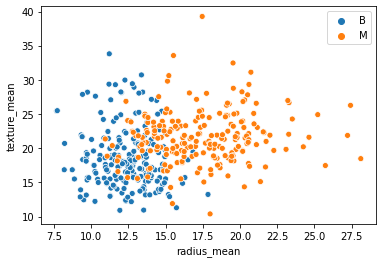

In [20]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=new_df,hue=new_y)